In [9]:
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LinearRegression

In [3]:
dataset = pd.read_csv('./house_prices.csv')
dataset.dropna(inplace=True)
dataset.head()


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

<AxesSubplot:xlabel='price', ylabel='Count'>

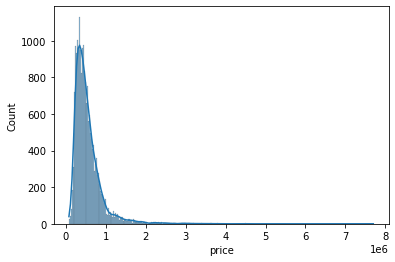

In [5]:
#preço da casa (alvo)
sns.histplot(dataset['price'], kde =True)
#distribuição gamma

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

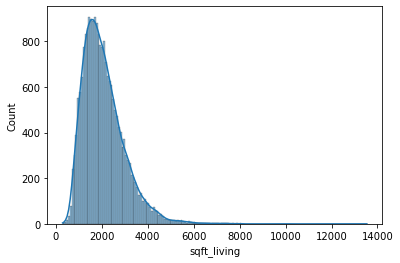

In [6]:
#metros quadrados
sns.histplot(dataset['sqft_living'], kde =True)
#distribuição gamma

In [7]:
#fazendo testes sem tratamento
x = dataset['sqft_living'].values
x = x.reshape(-1,1)
y = dataset['price'].values

In [10]:
#sem teste separado
#treinamento do modelo
regressor = LinearRegression()
regressor.fit(x, y)
previsoes = regressor.predict(x)

In [12]:
from sklearn.metrics import mean_absolute_error, r2_score
#erro absoluto ( diferença absoluta)
mean_absolute_error(y, previsoes)
#resultado é  a média do erro pra cima ou pra baixo

173688.27335953107

In [13]:
#quanto mais proximo de um melhor o resultado
r2_score(y, previsoes)

0.4928532179037931

<AxesSubplot:ylabel='Count'>

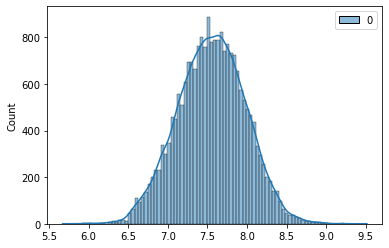

In [17]:
#Fazendo o tratamento dos dados
xNovo = np.log(x)
sns.histplot(xNovo, kde =True)


<AxesSubplot:ylabel='Count'>

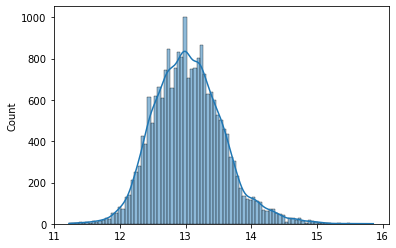

In [26]:
yNovo = np.log(y)
sns.histplot(yNovo, kde =True)

In [27]:
regressor = LinearRegression()
regressor.fit(xNovo, yNovo)
previsoes = regressor.predict(xNovo)

mean_absolute_error(yNovo, previsoes)

0.314671784942507

In [28]:
r2_score(yNovo, previsoes)

0.45550706431577015